### <center> Predicting direction of market based on a single best predictor</center>

#### Importing the required libraries:

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import sklearn as sk
import sklearn.tree as tree
import seaborn as sns
from IPython.display import Image  
import pydotplus
import plotly.plotly as py
from plotly.graph_objs import *
pd.set_option('display.max_columns', None)
pd.set_option('precision', 2)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from collections import Counter
import itertools
import matplotlib.ticker as tick
import matplotlib.patches as patches
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as pyplt
% matplotlib inline
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

Populating the interactive namespace from numpy and matplotlib


In [139]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

In [140]:
df = pd.read_csv("Weekly.csv", encoding = 'latin-1')

In [141]:
df.head(3)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.82,1.57,-3.94,-0.23,-3.48,0.15,-0.27,Down
1,1990,-0.27,0.82,1.57,-3.94,-0.23,0.15,-2.58,Down
2,1990,-2.58,-0.27,0.82,1.57,-3.94,0.16,3.51,Up


In [142]:
df.shape

(1089, 9)

#### Checking for nulls:

In [143]:
df.isna().any()

Year         False
Lag1         False
Lag2         False
Lag3         False
Lag4         False
Lag5         False
Volume       False
Today        False
Direction    False
dtype: bool

#### Converting categorical column to numerical:

In [144]:
def directions(x):
    if x == 'Up':
        return 1
    else:
        return 0

In [145]:
df['Directions'] = df.Direction.apply(directions)

In [146]:
df_new = df.drop(['Direction'], axis= 1)

In [147]:
df_new.head(2)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Directions
0,1990,0.82,1.57,-3.94,-0.23,-3.48,0.15,-0.27,0
1,1990,-0.27,0.82,1.57,-3.94,-0.23,0.15,-2.58,0


In [148]:
df_new.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Directions
count,1089.00,1089.00,1089.00,1089.00,1089.00,1089.00,1089.00,1089.00,1089.00
mean,2000.05,0.15,0.15,0.15,0.15,0.14,1.57,0.15,0.56
std,6.03,2.36,2.36,2.36,2.36,2.36,1.69,2.36,0.50
min,1990.00,-18.20,-18.20,-18.20,-18.20,-18.20,0.09,-18.20,0.00
25%,1995.00,-1.15,-1.15,-1.16,-1.16,-1.17,0.33,-1.15,0.00
50%,2000.00,0.24,0.24,0.24,0.24,0.23,1.00,0.24,1.00
75%,2005.00,1.41,1.41,1.41,1.41,1.41,2.05,1.41,1.00
max,2010.00,12.03,12.03,12.03,12.03,12.03,9.33,12.03,1.00


#### Exploring relationship between variables:

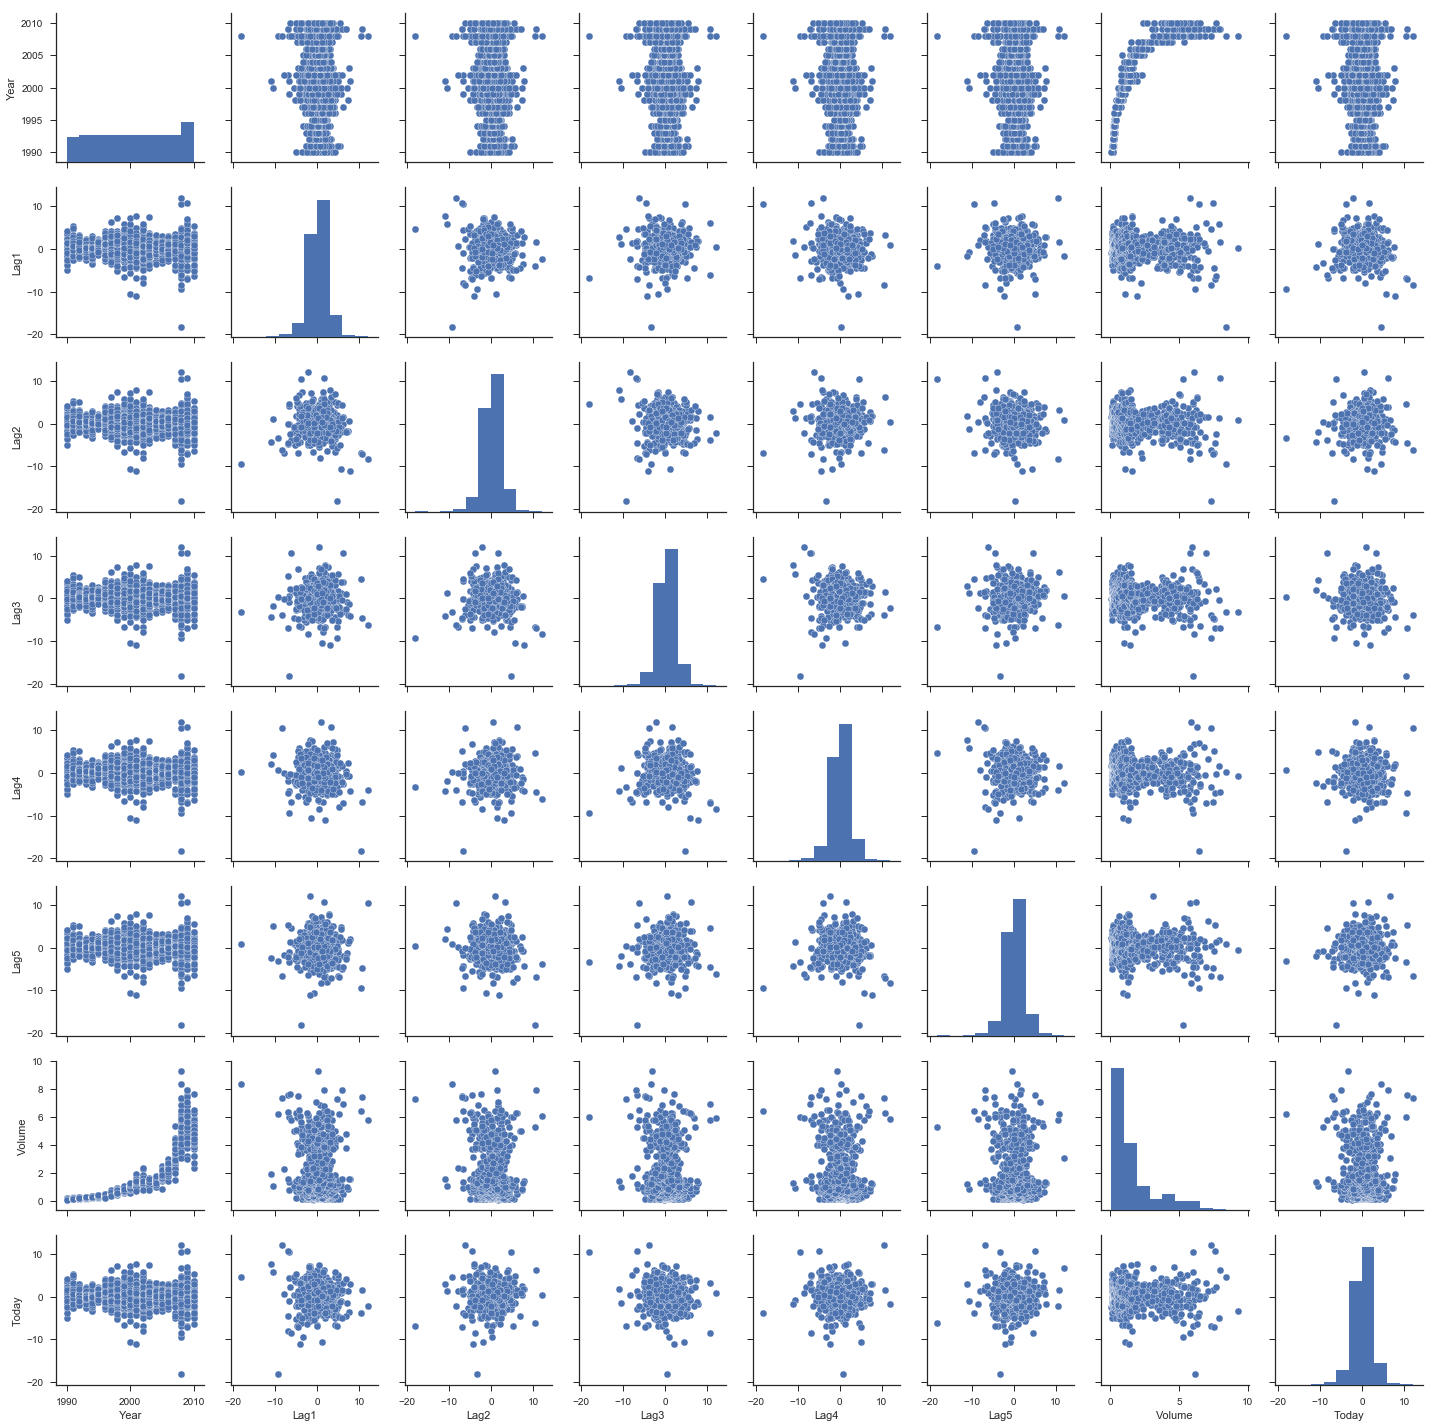

In [12]:
sns.pairplot(df)

In [150]:
df_new.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Directions
Year,1.00,-3.23e-02,-0.03,-0.03,-3.11e-02,-3.05e-02,0.84,-3.25e-02,-0.02
Lag1,-0.03,1.00e+00,-0.07,0.06,-7.13e-02,-8.18e-03,-0.06,-7.50e-02,-0.05
Lag2,-0.03,-7.49e-02,1.00,-0.08,5.84e-02,-7.25e-02,-0.09,5.92e-02,0.07
Lag3,-0.03,5.86e-02,-0.08,1.00,-7.54e-02,6.07e-02,-0.07,-7.12e-02,-0.02
Lag4,-0.03,-7.13e-02,0.06,-0.08,1.00e+00,-7.57e-02,-0.06,-7.83e-03,-0.02
Lag5,-0.03,-8.18e-03,-0.07,0.06,-7.57e-02,1.00e+00,-0.06,1.10e-02,-0.02
Volume,0.84,-6.50e-02,-0.09,-0.07,-6.11e-02,-5.85e-02,1.00,-3.31e-02,-0.02
Today,-0.03,-7.50e-02,0.06,-0.07,-7.83e-03,1.10e-02,-0.03,1.00e+00,0.72
Directions,-0.02,-5.00e-02,0.07,-0.02,-2.05e-02,-1.82e-02,-0.02,7.20e-01,1.00


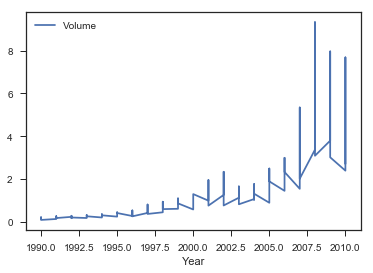

In [151]:
df.plot(x='Year',y='Volume')
plt.show()

### Year and Volume seem to have relationship. Volume goes on increasing over time.

#### Using glm from statsmodel to print summary:

In [152]:
modelsummary = smf.glm(formula = "Directions ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data = df_new).fit()
modelsummary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Directions   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                         0.24629
Method:                          IRLS   Log-Likelihood:                -778.73
Date:                Sun, 28 Oct 2018   Deviance:                       266.49
Time:                        01:26:52   Pearson chi2:                     266.
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5660      0.021     26.852      0.000       0.525       0.607
Lag1          -0.0100      0.006     -1.559      0.119      -0.023       0.003
Lag2           0.0141      0.006      2.177      0.029       0.001       0.027
Lag3          -0.0038      0.006     -0.582      0.560      -0.016       0.009
Lag4          -0.0067      0.006     -1.032      0.302      -0.019       0.006
Lag5          -0.0034      0.006     -0.529      0.597      -0.016       0.009
Volume        -0.0057      0.009     -0.635      0.525      -0.023       0.012
==============================================================================
"""

### Lag2 seems to be statistically significant with a p-value of less than 5%.

#### Performing logistic regression for predicting direction:

In [154]:
X = df_new.drop(['Year','Today','Directions'],axis=1)
Y = df_new['Directions']

In [155]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)   #scaling the features

StandardScaler(copy=True, with_mean=True, with_std=True)

In [156]:
log_reg = LogisticRegression()
log_reg.fit(X_transformed, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
log_reg.predict_proba(X_transformed)[0]

array([0.39, 0.61])

In [158]:
log_reg.score(X_transformed,Y)

0.5610651974288338

In [159]:
Y_predictions = log_reg.predict(X_transformed)
Y_predictions

array([1, 1, 1, ..., 1, 1, 1])

#### Plotting confusion matrix:

In [160]:
class_names = ["Down", "Up"]

<Figure size 504x504 with 0 Axes>

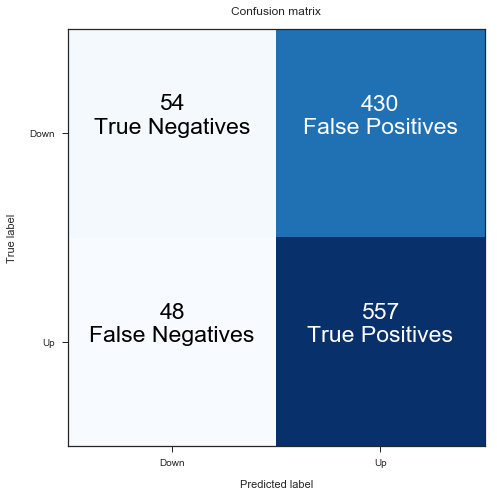

In [161]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, Y_predictions);
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

<b> Percentage of currect predictions: (54+557)/(54+557+48+430) = 56.1%. 
    <br>When the market goes up the model is right 92.1% times, [557/(557+48) = 92.1%]. 
    <br>When the market goes up the model is wrong 11.2% times, [54/(430+54) = 11.2%]. <br>
    The model predicted 'down' for 48 records when their true label was 'up'.<br>
    The model predicted 'up' for 430 records when their true label was 'down'. <br>
    The model predicted (557 + 54) 611 records correctly.
   

#### Using QDA:

#### Train set: Keeping it from 1990 to 2008

In [178]:
df_train = df_new[(df_new.Year >= 1990) & (df_new.Year <= 2008)]

In [179]:
df_train.shape

(985, 9)

In [181]:
X_train = df_train['Lag2'].values.reshape(-1, 1)
y_train = df_train['Directions'].values

In [182]:
qda = QDA()
qda.fit(X_train, y_train) #fitting model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

#### Test set: Will include data from 2009 and 2010

In [183]:
df_test = df_new[(df_new.Year == 2009) | (df_new.Year == 2010)]

In [184]:
df_test.shape

(104, 9)

In [185]:
X_test = df_test['Lag2'].values.reshape(-1, 1)
y_test = df_test['Directions'].values

#### Model score:

In [188]:
qda.score(X_test,y_test) #score on test data

0.5865384615384616

In [189]:
y_prediction = qda.predict(X_test) #predicting using test data

#### Plotting confusion matrix:

<Figure size 504x504 with 0 Axes>

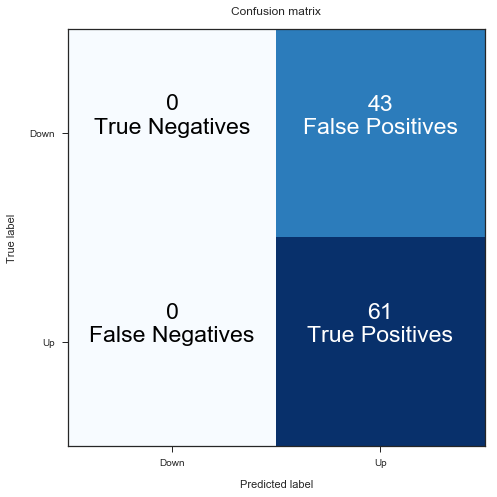

In [193]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_prediction);
np.set_printoptions(precision=2);

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

#### Fraction of correct predictions:

In [194]:
61 / (61+43)

0.5865384615384616

Error rate is 0.41

<b> The model is correct only 58.6% times. This might be because we are using just a single predictor. Thus, our model is performing poorly. To correct this we can use more than one predictor (combinations of predictors) by doing feature selection.

___

Reference : ISL